## Tornado Chart

A __tornado chart__ can be created using a combination of broken horizontal <br> bar charts `broken_barh()` in matplotlib.

Credit to *Marijn van Vliet* and *eitanlees* for code at <a href="https://stackoverflow.com/questions/32132773/a-tornado-chart-and-p10-p90-in-python-matplotlib" target="_blank">stackoverflow</a>. <br>

In [1]:
# libraries
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd

In [16]:
def tornado_chart(labels, midpoint, low_values, high_values):
    """
    Parameters
    ----------
    labels : np.array()
        List of label titles used to identify the variables, y-axis of bar
        chart. The lengh of labels is used to itereate through to generate 
        the bar charts.
    midpoint : float
        Center value for bar charts to extend from. In sensitivity analysis
        this is often the 'neutral' or 'default' model output.
    low_values : np.array()
        An np.array of the model output resulting from the low variable 
        selection. Same length and order as label_range. 
    high_values : np.array()
        An np.array of the model output resulting from the high variable
        selection. Same length and order as label_range.
    """
    
    color_low = '#d9301d'
    color_high = '#196d20'
    
    ys = range(len(data['Labels']))[::1] # iterate through # of labels
    
    for y, low_value, high_value in zip(ys, data['Low values'], 
                                    data['High values']):
    
        low_width = midpoint - low_value
        high_width = high_value - midpoint
    
        plt.broken_barh(
            [
                (low_value, low_width),
                (midpoint, high_width)
            ],
            (y-0.4, 0.8), # thickness of bars and their offset
            facecolors = [color_low, color_high],
            edgecolors = ['black', 'black'],
            linewidth = 0.5
            )
        
        offset = 2 # offset value labels from end of bar
        
        if high_value > low_value:
            x_high = midpoint + high_width + offset 
            x_low = midpoint - low_width - offset
        else:
            x_high = midpoint + high_width - offset
            x_low = midpoint - low_width + offset

        plt.text(x_high, y, str(high_value), va='center', ha='center')
        plt.text(x_low, y, str(low_value), va='center', ha='center')
    
    plt.axvline(midpoint, color='black', linewidth = 1)

    # set axis lines on or off
    ax = plt.gca() 
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    
    # build legend 
    legend_lines = [Line2D([0], [0], color=color_low, lw=8),
                    Line2D([0], [0], color=color_high, lw=8)]
    ax.legend(legend_lines, ['Low', 'High'], loc='lower right')
    
    plt.xlabel('Model output')
    plt.yticks(ys, labels)
    plt.xlim(0,40)
    plt.ylim(-0.5, len(labels)-0.5)
    plt.show
    
    return

In [19]:
# data for chart
labels = np.char.array([
    'Variable 1',
    'Variable 2',
    'Variable 3',
    'Variable 4',
    'Variable 5',
    'Variable 6',
]) 

# units or descriptions of labels
sub_labels = np.char.array([
    '\n 1.0 - 5.0',
    '\n 11% - 15%',
    '\n $200 - $300',
    '\n $12 - $14',
    '\n Off - On',
    '\n Low - High'
])
labels = labels + sub_labels

midpoint = 20

# data values
low_values = np.array([ # value order corresponds to label order
    19.5,
    18,
    15.5,
    12,
    32.5,
    4 
])

high_values = np.array([
    20.5,
    22,
    24.5,
    28,
    7.5,
    36
])

var_effect = np.abs(high_values - low_values)/midpoint

data = pd.DataFrame({'Labels': labels,
                     'Low values': low_values,
                     'High values': high_values,
                     'Variable effect' : var_effect
                    })

# sorts effect high to low, adjust to preference
data = data.sort_values('Variable effect', axis=0, ascending=True, 
                        inplace=False, ignore_index=False, key=None)

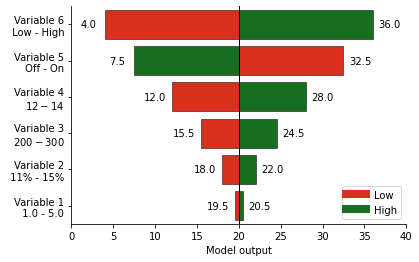

In [20]:
tornado_chart(labels, midpoint, data['Low values'], data['High values'])